# Theoretical concepts of single particle tracking (SPT): an introduction for biologists.
#### François Peaudecerf; Margit Peaudecerf
#### 24/02/2021



## Random walks and the Stokes-Einstein equation

Particles suspended in fluid exhibit random motion caused by thermal agitation, independently of any fluid flows. In a viscous fluid the magnitude of this random walk - the diffusivity - is described in the Stokes-Einstein equation as  

$$ D = \frac{k_\mathrm{B} T}{6 \pi \mu a} $$

with $D$ the **Brownian diffusivity**, $k_\mathrm{B}$ the **Boltzmann constant**, $T$ the absolute __temperature__ of the fluid, $\mu$ the dynamic __viscosity__ of the fluid, and $a$ the __radius of the particle__ . Implications of the Stokes-Einstein relation are: 
* Particles will exhibit random motion at any temperature above absolute zero
* Particle diffusivity will decrease with particle radius and fluid viscosity, and increase with temperature (though since we are looking at absolute temperature biologically relevant temperature changes will have a minimal effect).



Macroscopically, a population of particles randomly diffusing within a fluid results in diffusive mixing and net-fluxes along concentration gradients. However, SPT follows the displacement of individual particles, and as molecular diffusion within a homogeneous environment is random the net displacement of each single particle averages zero: let's consider a particle randomly diffusing in one dimension. This particle is equally likely to move in each direction from its starting point. Therefore over time the sum of its displacements $\Delta x$ (in 2D $\Delta r$) will equal zero: 
 
<img src="images/RandomDisplacement.png" alt="Drawing" style="width: 700px;"/>


However, with more time this particle random motion explores further regions. Thus, in order to quantify the space explored by a diffusing particle over time, the square of the displacement $\Delta x^2$ (in 2D $\Delta r^2$) is the variable of choice. As for all random processes, patterns can only emerge by averaging a significant number of events, therefore the average displacement over time - mean square displacement (MSD) - is calculated: we consider a particle randomly walking in one dimension. We observe particle positions with time $x_t$ at intervals of 1s, so that x<sub>t</sub><sub>1</sub> is the particle position at 1s, x<sub>t</sub><sub>2</sub> the particle position at 2s, etc: 

<img src="images/particles1.png" alt="Drawing" style="width: 700px;"/>


The MSD, noted $ \langle \Delta x^2 \rangle$, can be calculated either as a **time average**, by averaging particle displacements within all 1s intervalls of the trajectory, then particle displacement within all 2s intervalls, etc over the trajectory of a single particle 

$$ \langle \Delta x^2 \rangle = <[x_{(t+\Delta_t)}-x_{(t)}]^2> ,$$

or as an **ensemble average**, by averaging particle displacements within the first 1s, the first 2s, etc. of multiple trajectories 

$$ \langle \Delta x^2 \rangle = <[x_{(t)}-x_{(t_0)}]^2> ,$$

or often a combination of the two, with $\Delta_t$ the time interval (or lag time) between particle positions.
The mean square displacement of a particle moving randomly with Brownian motion scales linearly</font> with diffusivity $D$ and lag time $\Delta_t$. For one dimension, the MSD follows

$$ \langle \Delta x^2 \rangle = 2D \Delta_t ,$$

and for diffusion in two dimensions it reads

$$ \langle \Delta r^2 \rangle = 4D \Delta_t .$$




## Simulation of 2D Brownian motion


We simulate single particle motion in a homogeneous fluid at thermal equilibrium. The parameters of the simulation are the following:

* __Radius of the particle__ $a$, in microns;
* __Temperature__ of the fluid $T$, fixed at 308K (35C);
* Dynamic __viscosity__ of the fluid $\mu$, in Pa s. As an example: at 20C water has a viscosity of $\mu = 10^{-3}$ Pa s while glycerol has a viscosity of $\mu = 1$ Pa s.

From these parameters, one can derive the **Brownian diffusivity** $D$ associated to these particles in this fluid, thanks to the **Stokes-Einstein equation** above. 

We will use a variety of Python tools both in the notebook and in the functions we built to simulate random motion (see file random_walkers.py in repository). These libraries and packages are:
* [Numpy](https://numpy.org/) for maths
* [Matplotlib](https://matplotlib.org/3.3.3/index.html) for plotting
* [Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) to use interactive IPython widgets
* [Pandas](https://pandas.pydata.org/) as a tool for data analysis
* [Trackpy](http://soft-matter.github.io/trackpy/v0.4.2/) which offers tracking tools and track-analysis function which we will use
* [Scipy](https://www.scipy.org/) for some statistical tools

We will start by importing some of them for use in this notebook:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# IPython tools
from IPython.display import display
from IPython.display import Video
from IPython.display import HTML
from ipywidgets import interact, interactive_output, FloatSlider,IntSlider, HBox, VBox
import ipywidgets as widgets

# we import our random walker functions
from random_walkers import *


### 1. Example track

In most of the simulations, we consider a number $N$ of particles. For each incremental timestep $dt$, each of these particles receives a random "kick" from the surrounding agitation of fluid molecules by temperature, creating a infinitesimal displacement scaling with diffusivity $D$. We first build a function <font color='red'>`generate_diff_track`</font> that does just that, taking as input an initial position in space $x_0$ and $y_0$ - parameter `pos0` below -, a chosen diffusivity `D`, an incremental timestep of simulation `dt` over which we want to compute individual kicks, and the total time `tf` of simulation.

We can see an example of generated track as an array after choosing test parameter values:

In [2]:
pos0 = [0,0] # [m]
D = 1e-10     # [m2/s] 
dt = 1e-2    # [s]
tf = 0.2       # [s]
test_track = generate_diff_track(pos0, D, dt, tf)*1e6 # to convert to microns, generate_diff_track return results in m
print('x(t) =', test_track[0,:])
print('y(t) =', test_track[1,:])

x(t) = [ 0.         -0.73757506  0.72923537 -1.04142568 -1.15241025  0.56437119
 -1.0427549  -2.56756647 -2.42921508 -4.12586606 -4.7203497  -6.5297231
 -5.85458162 -6.20629421 -5.52367957 -5.15315562 -4.96223922 -4.81410798
 -4.98834792 -3.55198741 -3.22493921]
y(t) = [ 0.          0.98024747  1.40156363  1.92959438  0.30531138  2.07539378
  2.61004639  1.61148188  3.20111775  1.76344711  2.29110556  2.33225222
  2.26041259  2.51552305  2.21740072  0.36834581 -2.93339843 -1.01708156
 -0.71928633 -1.33046178 -1.34542509]


It is easier to see how different parameters play a role in shaping these tracks if we plot them. Here is a visualisation of our example track above, with the initial position as a white circle, and the end position as a magenta circle:

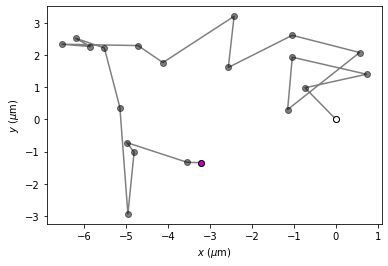

In [3]:
fig, ax = plt.subplots()
ax.plot(test_track[0,:],test_track[1,:], color = 'k', alpha = 0.5, marker='o')
ax.plot(test_track[0,-1],test_track[1,-1],marker='o', ms=6, markerfacecolor = 'm', markeredgecolor = 'k')
ax.plot(0,0,marker='o', ms=6, markerfacecolor = 'w', markeredgecolor = 'k')

ax.set_xlabel(r'$x$ ($\mu$m)')
ax.set_ylabel(r'$y$ ($\mu$m)')
    
plt.show()


### 2. Distribution of displacements

To visualise the randomness of these trajectories, let's generate a few tracks and look at the distribution of their displacements.

In [4]:
# Creation of buttons and sliders
style = {'description_width': 'initial'}
N_s = widgets.IntSlider(description = 'number part. $N$', style = style, min=1, max=50, step=1, value=1)
D_s = widgets.FloatSlider(description = 'Diffusivity $D$ ($\mu$m$^2$s$^{-1}$)', style = style, min=0.01, max=5, step=0.01, value=2.0)
Tf_s = widgets.FloatSlider(description = 'duration $t_\mathrm{f}$ (s)', style = style, min=0.1, max=10, step=0.1, value=1)
ax_lim_s = widgets.FloatSlider(description = 'axes size ($\mu$m)', style = style, min=0.1, max=10, step=0.1, value=5)
deltaX_show_b = widgets.ToggleButton(value=False,description='Show displacements',disabled=False,button_style='',tooltip='Description',icon='')
refresh_b = widgets.ToggleButton(value=False,description='Refresh',disabled=False,button_style='success', tooltip='Description',icon='')
logscale_b = widgets.ToggleButton(value=False,description='deltaX Log scale',disabled=False,button_style='', tooltip='Description',icon='')

# We organise them spatially
left_box = VBox([N_s,D_s, Tf_s])
right_box = VBox([ax_lim_s, deltaX_show_b, refresh_b, logscale_b])
widgets_box = HBox([left_box, right_box])

# Launch the plot and display with buttoms/sliders
out = interactive_output(plot_tracks_deltaX, {'N': N_s, 'D': D_s, 'Tf': Tf_s, 'ax_lim':ax_lim_s, 'deltaX_show':deltaX_show_b, 'refresh':refresh_b, 'log_scale':logscale_b})
display(widgets_box, out)

Output()

The graph on the right shows a histogram of displacement distribution. The distribution shows a Gaussian profile, symmetric and centered on 0, as the displacements are random and therefore average 0. The variance increases with $\Delta_t$, and scales with the diffusivity D. Gaussian fit improves with increasing $N$ and $t_f$.


### 3. Mean square displacement (MSD) in unbounded case

We now create an interactive function to better visualize the influence of different physical parameters on Brownian diffusivity of particles, and their mean square displacements.

In [5]:
# Creation of buttons and sliders
style = {'description_width': 'initial'}
N_s = widgets.IntSlider(description = 'number part. $N$', style = style, min=1, max=50, step=1, value=1)
a_s = widgets.FloatSlider(description = 'radius $a$ ($\mu$m)', style = style, min=0.02, max=1, step=0.02, value=0.2)
logmu_s = widgets.IntSlider(description = ' $\log(\mu)$ (log(Pa s))', style = style, min=-3, max=0, step=1, value=-3)
Tf_s = widgets.FloatSlider(description = 'duration $t_\mathrm{f}$ (s)', style = style, min=0.1, max=10, step=0.1, value=1)
ax_lim_s = widgets.FloatSlider(description = 'axes size ($\mu$m)', style = style, min=0.1, max=15, step=0.1, value=4)
MSD_show_b = widgets.ToggleButton(value=False,description='Show MSDs',disabled=False,button_style='',tooltip='Description',icon='')
refresh_b = widgets.ToggleButton(value=False,description='Refresh',disabled=False,button_style='success', tooltip='Description',icon='')
logscale_b = widgets.ToggleButton(value=False,description='MSD Log scale',disabled=False,button_style='', tooltip='Description',icon='')

# We organise them spatially
left_box = VBox([N_s,a_s,logmu_s, Tf_s])
right_box = VBox([ax_lim_s, MSD_show_b, refresh_b, logscale_b])
widgets_box = HBox([left_box, right_box])

# Launch the plot and display with buttoms/sliders
out = interactive_output(plot_tracks_MSD, {'N': N_s, 'a': a_s, 'logmu': logmu_s, 'Tf': Tf_s, 'ax_lim':ax_lim_s, 'MSD_show':MSD_show_b, 'refresh':refresh_b, 'log_scale':logscale_b})
display(widgets_box, out)

Output()

The equation 

$$ \langle \Delta r^2 \rangle=4D \Delta t .$$

allows extraction of diffusivity from experimental data as the slope of the linear fit of MSD curves, and if particle size is known, the viscosity experienced by the particles can be obtained using the Stokes-Einstein equation. Ensemble average and the associated fitted power law approach the theoretical power law with increasing $N$ and $t_f$, illustrating the need for a significant number of datapoints in order to obtain accurate values for diffusivity. 

### 4. Particle displacement and SPT in living cells 


The cytoplasm of living cells is a complex environment in which particle displacement is affected by multiple factors, such as active diffusion, corralling of particles, or active transport processes (see below). While this complicates diffusion analysis significantly, at the same time it renders SPT a powerful tool for investigating these factors. 
Particle displacement in living cells differs from the ideal case of free Brownian diffusion we considered above in several key aspects:

* diffusion may have an active component. Like Brownian motion **active diffusion** is random, however on top of the random "kicks" from the surrounding agitation of fluid molecules by temperature, particles experience additional  random "kicks" caused by active processes, enhancing particle displacements. Within the cytosol processes such as polymerization of cytoskeletal fibers and the movement of motor proteins along randomly organized cytoskeletal fibers have been suggested as possible sources for active diffusion (Brangwynne et al. 2009). Active diffusion will result in enhanced diffusivity of particles, which prevents direct calculation of viscosity from the MSD without additional experimental measures.
* diffusion may be **anomalous**, so that instead of increasing linearly with time MSD over time will follow a power law

$$ \langle \Delta x^2 \rangle =\alpha \Delta t^\beta $$


with $\beta$ the **anomalous exponent**. Anomalous diffusion with an exponent $\beta$<1 is termed subdiffusion, with $\beta$>1 superdiffusion. Within cells, superdiffusion may for example be caused by active transport of particles along the cytoskeleton, while subdiffusion can be the result of extreme crowding of the tracked particle. Visually, the MSD plots would look as follows:

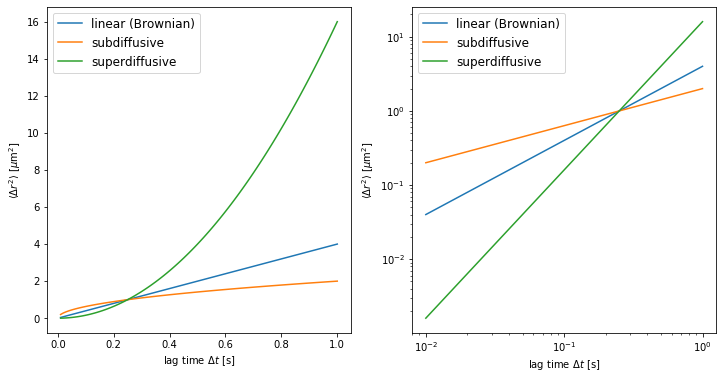

In [6]:
D = 1 #[um2/s]
beta1 = 0.5
beta2 = 2.0
deltat = np.linspace(dt, 100*dt,100)

fig, (ax, ax2) = plt.subplots(1,2,figsize = (12,6)) 
ax.plot(deltat,4*D*deltat,label = 'linear (Brownian)')
ax.plot(deltat,(4*D*deltat)**beta1,label = 'subdiffusive')
ax.plot(deltat,(4*D*deltat)**beta2,label = 'superdiffusive')
ax.legend(loc=0, prop={'size': 12})

ax2.plot(deltat,4*D*deltat,label = 'linear (Brownian)')
ax2.plot(deltat,(4*D*deltat)**beta1,label = 'subdiffusive')
ax2.plot(deltat,(4*D*deltat)**beta2,label = 'superdiffusive')
ax2.legend(loc=0, prop={'size': 12})

ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
        xlabel='lag time $\Delta t$ [s]')
ax2.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
        xlabel='lag time $\Delta t$ [s]')
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.show()

* the cytoplasm is non-homogeneous, so that the viscosity experienced by particles may change with particle size. This can be tested experimentally by tracking particles of several sizes.

* particles are confined globally by the cell membrane, and often also locally by crowding or intracellular structures. As long as diffusion of the particle is not anomalous, the MSD will increase linearly with time, but after a certain lag time the curves will saturate to a maximum value $\langle \Delta r^2 \rangle_\mathrm{max}$. SPT can help in characterizing crowding and ultrastructure of the cytoplasm, as the size of the confinement "cage" or "corral" the particle is experiencing can be extracted as

$$ d_c = d_p + 2  \sqrt{\langle \Delta r^2 \rangle_\mathrm{max}} $$,

assuming a spherical cage with $d_c$ the corral diameter, and $d_p$ the particle diameter. 


### 5. Mean square displacement (MSD) in bounded case

For the simulations, we constrain motion to a square box, of side $2 L$, and look at the behavior of the MSD. In our simulations the particles have effectively a size 0 (so the parameter $d_p$ does not play a role here).

In [7]:
# Creation of buttons and sliders
style = {'description_width': 'initial'}
N_s = widgets.IntSlider(description = 'number part. $N$', style = style, min=1, max=50, step=1, value=1)
D_s = widgets.FloatSlider(description = 'Diffusivity $D$ ($\mu$m$^2$s$^{-1}$)', style = style, min=0.01, max=5, step=0.01, value=2.0)
Tf_s = widgets.FloatSlider(description = 'duration $t_\mathrm{f}$ (s)', style = style, min=0.1, max=10, step=0.1, value=3)
L_s = widgets.FloatSlider(description = 'box half width $L$ ($\mu$m)', style = style, min=0.5, max=20, step=0.5, value=2)
refresh_b = widgets.ToggleButton(value=False,description='Refresh',disabled=False,button_style='success', tooltip='Description',icon='')
logscale_b = widgets.ToggleButton(value=False,description='MSD Log scale',disabled=False,button_style='', tooltip='Description',icon='')

# We organise them spatially
left_box = VBox([N_s,D_s, Tf_s])
right_box = VBox([L_s, refresh_b, logscale_b])
widgets_box = HBox([left_box, right_box])

# Launch the plot and display with buttoms/sliders
out = interactive_output(plot_tracks_MSD_box, 
                         {'N': N_s, 'D': D_s, 'Tf': Tf_s, 'L':L_s, 'refresh':refresh_b, 'log_scale':logscale_b})
display(widgets_box, out)

Output()

The MSD plot on the right shows two components: in the initial part free diffusion dominates, causing a linear increase of MSD with time, in the second part of the curve the corral blocks free diffusion of the particle, causing the curve to saturate. With sufficiently large $N$ and $t_f$, both viscosity and corral size can be extracted from the MSD plot.

## SPT example from living cells

Below are videos of GEM particles (genetically encoded multimeric nanoparticles: Delarue et al. 2018) with a diameter of 40nm tracked in HeLa cells. The first movie shows the GEMs diffusing inside the cytosol, the second movie shows the particles tracked with Trackpy. Individual tracks are visualized in the image below the videos.

In [8]:
Video("videos/GEMS_HeLa_01001-1 (Converted).mov")

In [9]:
HTML("""
<video width="600" controls>
  <source src="videos/particleSize=5_minmass=125_minsize=0-Copy1.7_maxpath=10.0_mintrack=10_memory=2_short.mp4" type="video/mp4">
</video>
""")



The particle tracks can be visualized individually:

<img src="images/GEMS_HeLa_directed.png" alt="Drawing" style="width: 700px;"/> 






## References and further reading 


* Berg, Howard C. Random Walks in Biology. Princeton, N.J.: Princeton University Press, 1983. 
* Delarue M, Brittingham GP, Pfeffer S, Surovtsev IV, Pinglay S, Kennedy KJ, Schaffer M, Gutierrez JI, Sang D, Poterewicz G, Chung JK, Plitzko JM, Groves JT, Jacobs-Wagner C, Engel BD, Holt LJ. mTORC1 Controls Phase Separation and the Biophysical Properties of the Cytoplasm by Tuning Crowding. *Cell* **174**, 338-349.e20 (2018) [doi: 10.1016/j.cell.2018.05.042](https://doi.org/10.1016/j.cell.2018.05.042)
* Brangwynne CP, Koenderink GH, MacKintosh FC, Weitz DA. Intracellular transport by active diffusion. *Trends Cell Biol.* **19**:423-7 (2009) [doi: 10.1016/j.tcb.2009.04.004](https://doi.org/10.1016/j.tcb.2009.04.004)


